In [2]:
import cv2
import numpy as np

def get_document_contour(image_path, blur_kernel=(5, 5), canny_low=50, canny_high=150, 
                        min_area=1000, epsilon_factor=0.02):
    """
    Find document contour using approxPolyDP.
    
    Parameters:
    image_path: str - path to image
    blur_kernel: tuple - Gaussian blur kernel size
    canny_low: int - lower Canny threshold
    canny_high: int - upper Canny threshold  
    min_area: int - minimum contour area
    epsilon_factor: float - approximation accuracy factor
    
    Returns:
    approx: np.ndarray - approximated polygon points (or None if not found)
    """
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load image: {image_path}")
        return None
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply blur to reduce noise
    blurred = cv2.GaussianBlur(gray, blur_kernel, 0)
    
    # Edge detection
    edges = cv2.Canny(blurred, canny_low, canny_high)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours by area (largest first)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    # Find document contour (should be largest rectangular shape)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < min_area:
            continue
            
        # Approximate contour
        epsilon = epsilon_factor * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        # Check if approximation has 4 points (rectangle/quadrilateral)
        if len(approx) == 4:
            return approx
    
    print("No document contour found")
    return None

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

SyntaxError: '(' was never closed (1726623154.py, line 63)

In [4]:
def get_rotation_matrix(angle: int) -> np.ndarray:
    """
    angle: int - angle in grads
    
    """
    rad = np.deg2rad(angle)
    sin, cos = np.sin(rad), np.cos(rad)
    return np.array(
        [[cos, -1 * sin], 
         [sin, cos]])



In [ ]:
def plot_vector2(vector: np.ndarray, transformations: np.ndarray) -> None:
    pass


In [53]:
def plot_vector(vector: np.ndarray, title: str, original: np.ndarray | None = None) -> None:
    fig, ax = plt.subplots()
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r',
               linestyle='dashed')

    if original is not None:
        orig = plt.quiver(0, 0, original[0], original[1], angles='xy', scale_units='xy', 
                  scale=1, color='gray', )
        orig.set_linestyle('--')

    ax.set_ylim([-2, 2])
    ax.set_xlim([-2, 2])
    
    plt.title(title)
    plt.grid()
    plt.show()

In [35]:

# Create your own transformation playground
def defvisualize_transformation(points: np.ndarray, transform_matrix: np.ndarray, title: str) -> None:
    transformed = transform_matrix @ points
    plot_vector(transformed, title, points)

# Interactive visualization to see transformations

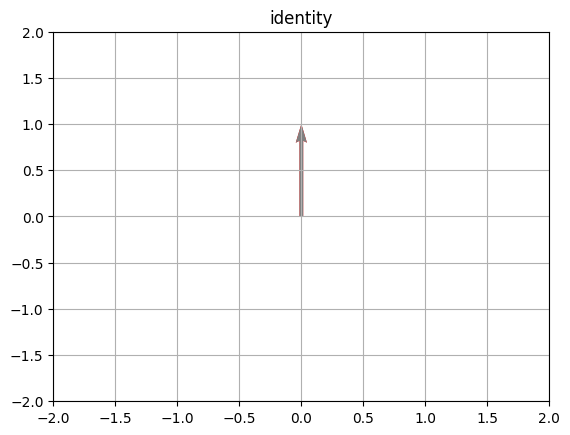

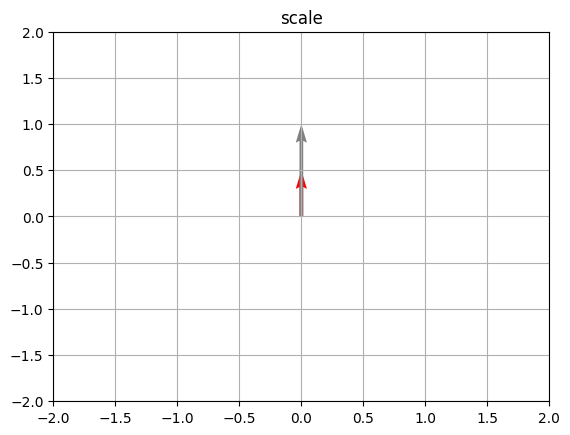

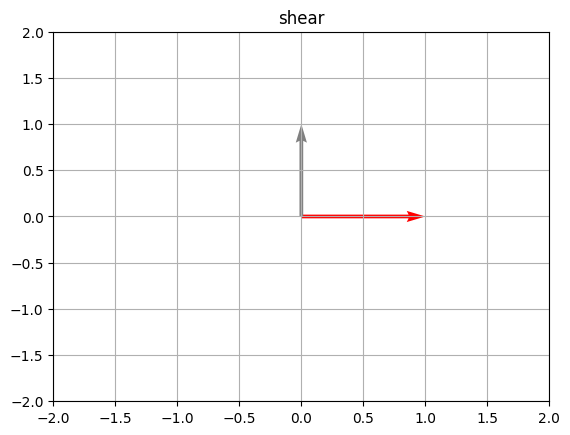

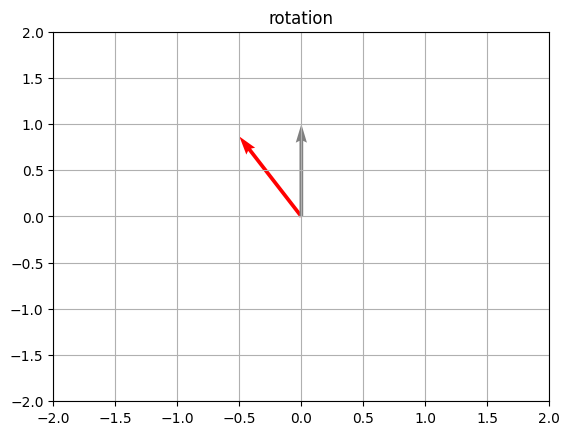

In [54]:
v = np.array([0,1])
# scale_1 = np.eye(2,); 
# iden = np.eye(2, ); 
# shear = np.array([[0, 2], [1, 0]])
# rotation = get_rotation_matrix(30)

transformations = [
    (np.eye(2,),'identity'),
    (np.eye(2,)*0.5,'scale'),
    (np.array([[0, 1], [1, 0]]), 'shear'), 
    (get_rotation_matrix(30),'rotation')
]


for (trans, title) in transformations:
    defvisualize_transformation(v, trans, title)

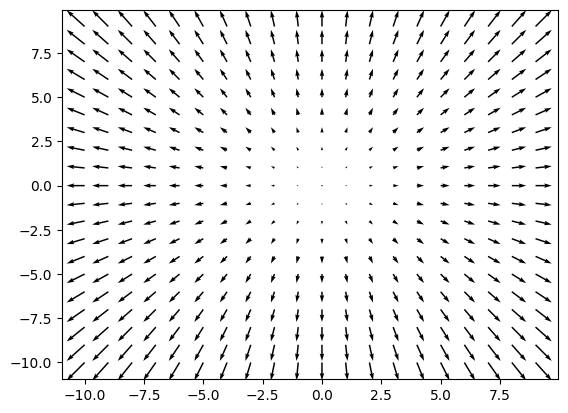

In [55]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [2]:
# implement perspective removal 
import cv2

In [4]:
import os

impath = '/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/book.jpg'

img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

(1333, 1000, 3)


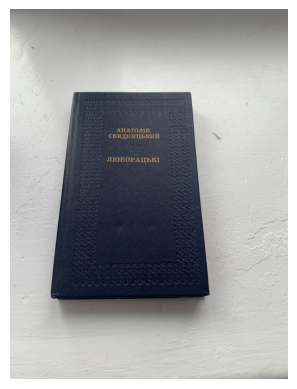

In [119]:
height, width = img.shape[:2]
if width > 1000:
    scale = 1000 / width
    img = cv2.resize(img, (int(width * scale), int(height * scale)))

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()
    

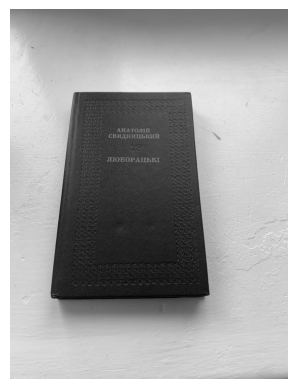

In [121]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

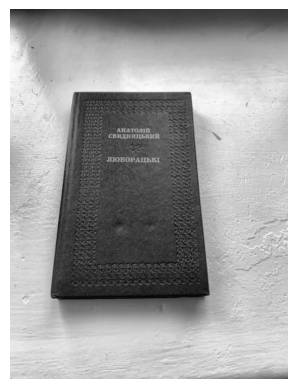

In [122]:
# add blur to remove noise:
blurred = cv2.GaussianBlur(gray, (5,5), 0)
enhanced = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(blurred)


plt.imshow(enhanced, cmap='gray')
plt.axis('off')
plt.show()


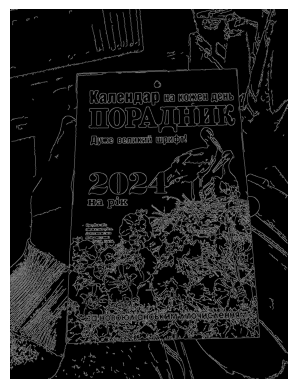

In [30]:
edges = cv2.Canny(enhanced, 50, 100, apertureSize=3)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours

2577

In [43]:


approx = cv2.approxPolyDP(
    contours[0], 
    epsilon=0.015 * cv2.arcLength(contours[0], True), 
    closed=True)
approx

array([[[ 893, 1331]],

       [[ 892, 1330]],

       [[ 891, 1331]],

       [[ 890, 1330]],

       [[ 889, 1331]],

       [[ 885, 1331]],

       [[ 889, 1331]],

       [[ 890, 1330]],

       [[ 891, 1331]]], dtype=int32)

In [10]:
def find_document_contour(contours,  img) -> np.ndarray | None:
    image_area = img.shape[0] * img.shape[1]
    for contour in sorted(contours, key=cv2.contourArea, reverse=True):
        contour_area = cv2.contourArea(contour)
        if contour_area < image_area * 0.1:
            # skip small contours, document should be a big contour
            continue

        # approximate contour to polygon
        for epsilon_factor in [0.2, 0.03, 0.015]:
            epsilon = epsilon_factor * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon=epsilon, closed=True)
            if len(approx) == 4:
                print(f'found! {len(approx)}')
                img_copy = img.copy()
                cv2.drawContours(img_copy, [contour], -1, (0, 255, 0), 2)
                plt.imshow(img_copy)
                return approx
            
    return None

def auto_canny(image, sigma=0.33):
      v = np.median(image)
      lower = int(max(0, (1.0 - sigma) * v))
      upper = int(min(255, (1.0 + sigma) *
  v))
      return cv2.Canny(image, lower, upper)
      

found! 4


array([[[ 231,  300]],

       [[ 148, 1040]],

       [[ 715, 1031]],

       [[ 649,  302]]], dtype=int32)

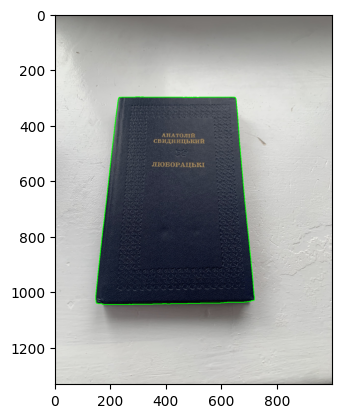

In [ ]:

img_ = cv2.imread(impath)
img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]
if width > 1000:
    scale = 1000 / width
    img = cv2.resize(img, (int(width * scale), int(height * scale)))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
# blurred = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(blurred)
image_area = enhanced.shape[0] * enhanced.shape[1]

edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# print(f'initial: {image_area}, minimal: {image_area * 0.1}')
# debug_contours(img, edges)
approx = find_document_contour(contours, img)
approx



In [33]:
rect = np.zeros((4,2))
rect
points = approx.reshape((4,2))

In [63]:
def order_points(points: np.ndarray) -> np.ndarray:
    rect = np.zeros((4,2), dtype='float32')
    s = points.sum(axis=1)
    diff = np.diff(points, 1)

    rect[0] = points[np.argmin(s)] # top left
    rect[1] = points[np.argmin(diff)] # top right
    rect[2] = points[np.argmax(s)] # bottom right
    rect[3] = points[np.argmax(diff)] # bottom left
    return rect


def get_destination_points(ordered_point: np.ndarray) -> tuple[np.ndarray, tuple[int, int]]:
    (tl, tr, br, bl) = ordered_point
    top_width = np.linalg.norm(tr - tl)
    bottom_width = np.linalg.norm(br - bl)
    max_width = int(max(top_width, bottom_width))

    left_height = np.linalg.norm(bl - tl)
    right_height = np.linalg.norm(br - tr)
    max_height = int(max(left_height, right_height))

    # define destination rectangle
    destination = np.array([
        [0,0], # top left
        [max_width - 1, 0], # top right
        [max_width - 1, max_height - 1], # bottom right
        [0, max_height - 1], # bottom left
    ], dtype='float32')

    return destination, (max_width, max_height)

def transform_perspective(img, points: np.ndarray):
    ordered_corners = order_points(points)
    (destination, (width, height)) = get_destination_points(ordered_corners)

    # knowing `ordered` actual points and destination, calculated the transformation matrix
    matrix = cv2.getPerspectiveTransform(ordered_corners, destination)
    warped = cv2.warpPerspective(img, matrix, (width, height))
    return warped


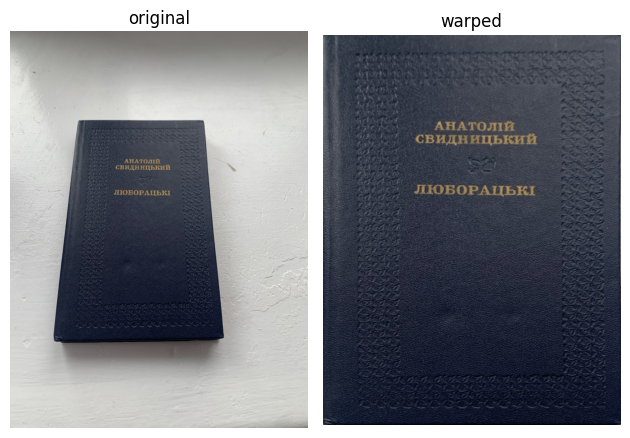

In [66]:
warped = transform_perspective(img, points)

fig, ax = plt.subplots(1, 2)


ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('original')

ax[1].imshow(warped)
ax[1].axis('off')
ax[1].set_title('warped')

plt.tight_layout()
plt.show()